In [1]:
import json

years = ['2021', '2022', '2023']

dps_results_map = {}
for year in years:
    
    f = open(f'archive/DPS/OLS/{year}.json')
    data = json.load(f)
    dps_results_map[year] = data

In [2]:
months = ['01', '02', '03', '04','05', '06','07', '08', '09', '10','11', '12']

gov_results_map = {}
# gov_no_results_map = {}
for year in years:
    year_map = {}
    # no_year_map = {}
    
    if year == '2023':
        months = months[0:2]
    for month in months:
        f = open(f'archive/OLS/{year}/{month}.json')
        data = json.load(f)
        year_map[month] = data
        
    gov_results_map[year] = year_map

In [3]:
tmd_results_map = {}
# tmd_no_results_map = {}
for year in years:
    year_map = {}
    no_year_map = {}
    
    f = open(f'archive/TMD/OLS/{year}.json')
    data = json.load(f)
    tmd_results_map[year] = data

In [34]:
dps_num = [0, 0, 0, 0, 3, 5, 2, 0, 5, 3, 2, 4, 3, 1, 0, 2, 2, 0, 0, 1, 3, 0, 1, 0, 0, 0]
tmd_num = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0]
len(dps_num)

26

In [48]:
num_art = {}
i = 0
for year, months in gov_results_map.items():
    for month, text in months.items():
        month_art = {}
        month_art['gov'] = len(text)
        month_art['dps'] = dps_num[i]
        month_art['tmd'] = tmd_num[i]
        i+=1
        
        num_art[f'{month}/{year}'] = month_art
        
num_art

{'01/2021': {'gov': 0, 'dps': 0, 'tmd': 0},
 '02/2021': {'gov': 0, 'dps': 0, 'tmd': 0},
 '03/2021': {'gov': 5, 'dps': 0, 'tmd': 0},
 '04/2021': {'gov': 2, 'dps': 0, 'tmd': 0},
 '05/2021': {'gov': 1, 'dps': 3, 'tmd': 0},
 '06/2021': {'gov': 1, 'dps': 5, 'tmd': 0},
 '07/2021': {'gov': 0, 'dps': 2, 'tmd': 0},
 '08/2021': {'gov': 3, 'dps': 0, 'tmd': 0},
 '09/2021': {'gov': 5, 'dps': 5, 'tmd': 1},
 '10/2021': {'gov': 3, 'dps': 3, 'tmd': 0},
 '11/2021': {'gov': 2, 'dps': 2, 'tmd': 0},
 '12/2021': {'gov': 2, 'dps': 4, 'tmd': 0},
 '01/2022': {'gov': 0, 'dps': 3, 'tmd': 1},
 '02/2022': {'gov': 4, 'dps': 1, 'tmd': 2},
 '03/2022': {'gov': 5, 'dps': 0, 'tmd': 0},
 '04/2022': {'gov': 10, 'dps': 2, 'tmd': 2},
 '05/2022': {'gov': 5, 'dps': 2, 'tmd': 0},
 '06/2022': {'gov': 4, 'dps': 0, 'tmd': 0},
 '07/2022': {'gov': 6, 'dps': 0, 'tmd': 3},
 '08/2022': {'gov': 5, 'dps': 1, 'tmd': 0},
 '09/2022': {'gov': 5, 'dps': 3, 'tmd': 0},
 '10/2022': {'gov': 5, 'dps': 0, 'tmd': 2},
 '11/2022': {'gov': 5, 'dps': 1

In [49]:
del num_art['01/2021']
del num_art['02/2021']

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas  as pd

In [60]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

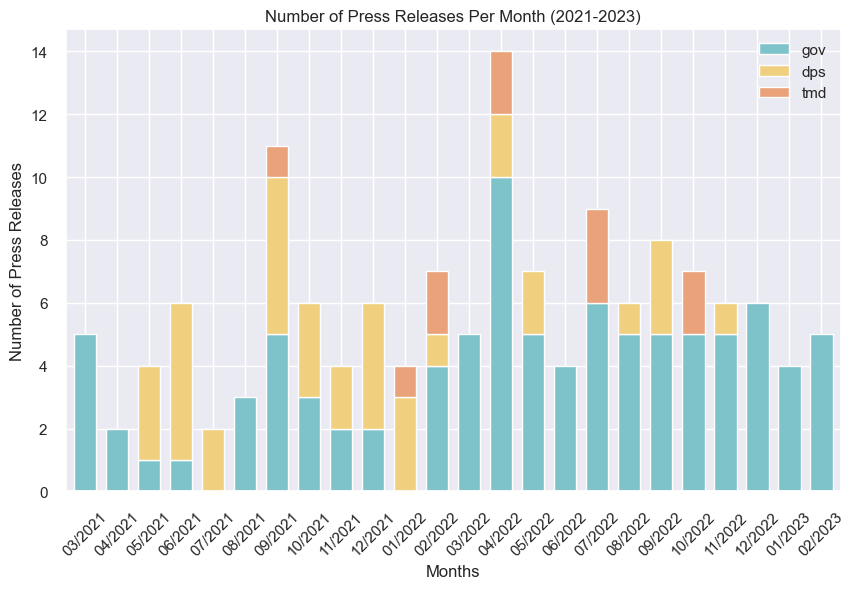

In [70]:
df = pd.DataFrame(num_art).T

sns.set(style="darkgrid")
my_palette = ['#7EC2CA', '#F0D07E', '#E9A279']

ax = df.plot.bar(stacked=True, figsize=(10, 6), color=my_palette, width=0.7)

plt.xticks(rotation=45)
ax.set_xlabel('Months')
ax.set_ylabel('Number of Press Releases')
ax.set_title('Number of Press Releases Per Month (2021-2023)')
ax.legend()

plt.savefig('images/num_art_all.png')
plt.show()